In [79]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [34]:
# Database Setup
engine = create_engine("sqlite:///sec13f.sqlite")

In [35]:
query = 'SELECT * FROM positions'
df_pos = pd.read_sql_query(query, engine)
df_pos.head()

,id,file_date,name,cusip,mval,shares
0,1,2013-06-30,AMERICAN EXPRESS CO,025816109,145942,1952142
1,2,2013-06-30,AMERICAN EXPRESS CO,025816109,1287771,17225400
2,3,2013-06-30,AMERICAN EXPRESS CO,025816109,62786,839832
3,4,2013-06-30,AMERICAN EXPRESS CO,025816109,145266,1943100
4,5,2013-06-30,AMERICAN EXPRESS CO,025816109,597679,7994634


In [36]:
query = 'SELECT * FROM indsectorindgroup'
df_dec = pd.read_sql_query(query, engine)
df_dec.head()

,id,cusip,indsec,indgrp
0,1,00206R102,Public Utilities,Telecommunications Equipment
1,2,02376R102,Transportation,Air Freight/Delivery Services
2,3,025816109,Finance,Finance: Consumer Services
3,4,037833100,Technology,Computer Manufacturing
4,5,064058100,Finance,Major Banks


In [45]:
merge_table = pd.merge(df_pos, df_dec, on="cusip", how="left")
merge_table.head()

,id_x,file_date,name,cusip,mval,shares,id_y,indsec,indgrp
0,1,2013-06-30,AMERICAN EXPRESS CO,025816109,145942,1952142,3,Finance,Finance: Consumer Services
1,2,2013-06-30,AMERICAN EXPRESS CO,025816109,1287771,17225400,3,Finance,Finance: Consumer Services
2,3,2013-06-30,AMERICAN EXPRESS CO,025816109,62786,839832,3,Finance,Finance: Consumer Services
3,4,2013-06-30,AMERICAN EXPRESS CO,025816109,145266,1943100,3,Finance,Finance: Consumer Services
4,5,2013-06-30,AMERICAN EXPRESS CO,025816109,597679,7994634,3,Finance,Finance: Consumer Services


In [46]:
merge_table.drop(['id_x', 'id_y'], axis=1, inplace=True)
merge_table.head()

,file_date,name,cusip,mval,shares,indsec,indgrp
0,2013-06-30,AMERICAN EXPRESS CO,025816109,145942,1952142,Finance,Finance: Consumer Services
1,2013-06-30,AMERICAN EXPRESS CO,025816109,1287771,17225400,Finance,Finance: Consumer Services
2,2013-06-30,AMERICAN EXPRESS CO,025816109,62786,839832,Finance,Finance: Consumer Services
3,2013-06-30,AMERICAN EXPRESS CO,025816109,145266,1943100,Finance,Finance: Consumer Services
4,2013-06-30,AMERICAN EXPRESS CO,025816109,597679,7994634,Finance,Finance: Consumer Services


In [52]:
df = merge_table.groupby(['file_date','name','cusip','indsec','indgrp'], as_index=False).sum()

,file_date,name,cusip,indsec,indgrp,mval,shares
0,2013-06-30,AMERICAN EXPRESS CO,025816109,Finance,Finance: Consumer Services,11334417,151610700
1,2013-06-30,BANK OF NEW YORK MELLON CORP,064058100,Finance,Major Banks,691264,24644029
2,2013-06-30,CHICAGO BRIDGE & IRON CO N V,167250109,Basic Industries,Engineering & Construction,569798,9550755
3,2013-06-30,COCA COLA CO,191216100,Consumer Non-Durables,Beverages (Production/Distribution),16044001,400000000
4,2013-06-30,CONOCOPHILLIPS,20825C104,Energy,Integrated oil Companies,1459497,24123911
5,2013-06-30,COSTCO WHSL CORP NEW,22160K105,Consumer Services,Department/Specialty Retail Stores,479140,4333363
6,2013-06-30,DAVITA HEALTHCARE PARTNERS I,23918K108,Health Care,Hospital/Nursing Management,1808848,14973906
7,2013-06-30,DEERE & CO,244199105,Capital Goods,Industrial Machinery/Components,323275,3978767
8,2013-06-30,DIRECTV,25490A309,Cyclical Consumer,Goods & Services,2297655,37275400
9,2013-06-30,DISH NETWORK CORP,25470M109,Technology,Radio And Television Broadcasting And Communic...,23272,547312


In [91]:
filtered = df[df['file_date'] == '2013-06-30']
filtered.head()

,file_date,name,cusip,indsec,indgrp,mval,shares
41,2013-06-30,WELLS FARGO & CO NEW,949746101,Finance,Major Banks,19113442,463131623
3,2013-06-30,COCA COLA CO,191216100,Consumer Non-Durables,Beverages (Production/Distribution),16044001,400000000
13,2013-06-30,INTERNATIONAL BUSINESS MACHS,459200101,Technology,Computer Manufacturing,13018792,68121984
0,2013-06-30,AMERICAN EXPRESS CO,025816109,Finance,Finance: Consumer Services,11334417,151610700
26,2013-06-30,PROCTER & GAMBLE CO,742718109,Basic Industries,Package Goods/Cosmetics,4064539,52793078


In [93]:
filtered.sort_values(['mval'], ascending=False, inplace=True)
filtered.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,file_date,name,cusip,indsec,indgrp,mval,shares
41,2013-06-30,WELLS FARGO & CO NEW,949746101,Finance,Major Banks,19113442,463131623
3,2013-06-30,COCA COLA CO,191216100,Consumer Non-Durables,Beverages (Production/Distribution),16044001,400000000
13,2013-06-30,INTERNATIONAL BUSINESS MACHS,459200101,Technology,Computer Manufacturing,13018792,68121984
0,2013-06-30,AMERICAN EXPRESS CO,025816109,Finance,Finance: Consumer Services,11334417,151610700
26,2013-06-30,PROCTER & GAMBLE CO,742718109,Basic Industries,Package Goods/Cosmetics,4064539,52793078


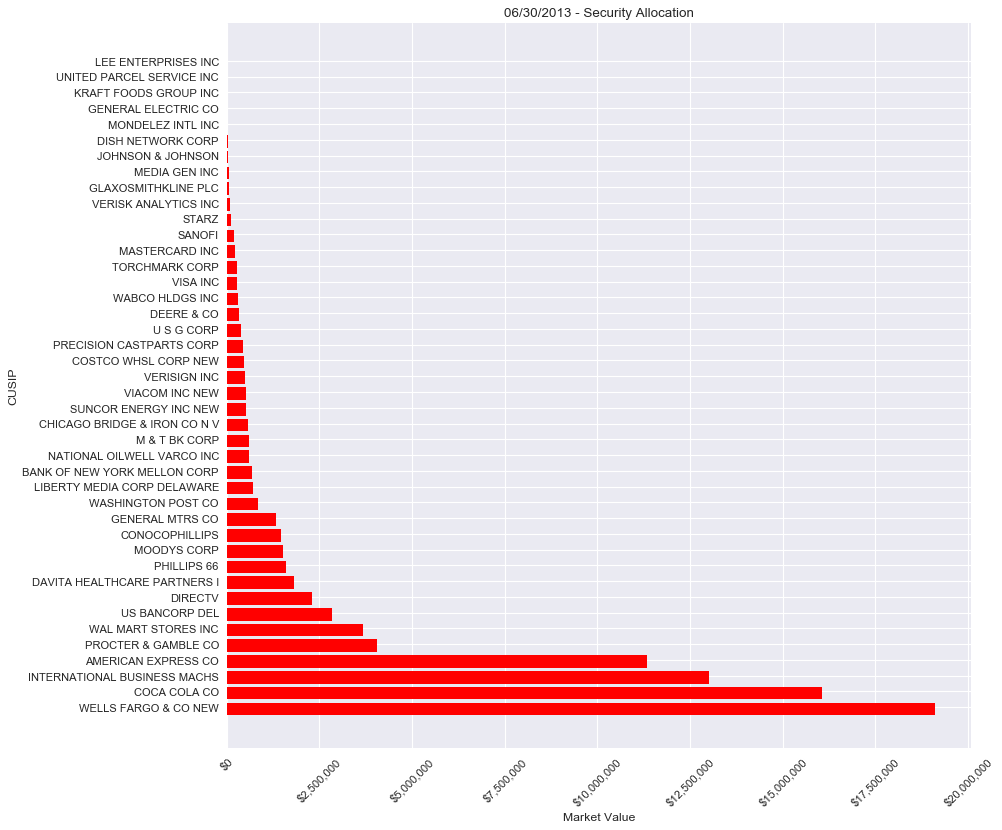

In [94]:

# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(12, 12), dpi=80)

# Create a new subplot from a grid of 1x1
ax = plt.subplot(1, 1, 1)

mval = filtered['mval']
names = filtered['name']
y_axis = np.arange(len(names))
plt.barh(y_axis, mval, color='r', alpha=1.0)

tick_locations = [value + 0.1 for value in y_axis]
plt.yticks(tick_locations, names, rotation=0)

fmt = '${x:,.0f}'
xtick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(xtick) 
plt.xticks(rotation=45)

plt.title("06/30/2013 - Security Allocation")
plt.xlabel("Market Value")
plt.ylabel("CUSIP")
sns.set()
#plt.savefig("bar.png")
plt.show()